In [ ]:
import sys
!{sys.executable} -m pip install pandasql
import pandas as pd
import warnings
import sqlalchemy
import seaborn as sns
#import json as json 
warnings.filterwarnings('ignore')

By Defaults pandas shows only 20 columns, so we will set the max columns display to None

In [15]:
pd.set_option("display.max_columns", None)

In [17]:
_file = 'bank-additional-full.csv'
df_bank = pd.read_csv(_file, 'Bank_data', delimiter=';').drop_duplicates() 
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
#for col in df_bank.dtypes:
print(df_bank.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [45]:
import matplotlib.pyplot as plt

In [68]:
from pandasql import sqldf
output = sqldf("select count(*) as count_of_rows from df_bank group by y")
print(output)

   count_of_rows
0          36537
1           4639


There is a definite class imbalance, suggesting that any prediction model will learn way too much about program success than about program failure.
It will be required to oversample the minority class or undersample the majority class.

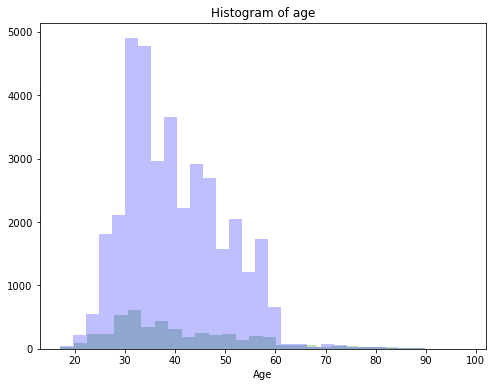

In [74]:
plt.figure(figsize=(8,6))
plt.hist(df_bank.loc[df_bank['y']=="yes"]['age'],label='Yes',alpha=0.25, color='g',bins=30)
#plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.hist(df_bank.loc[df_bank['y']=="no"]['age'],label='No',alpha=0.25,color='b',bins=30)

plt.xlabel('Age')
#plt.ylabel('Probability')
plt.title('Histogram of age')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.show()

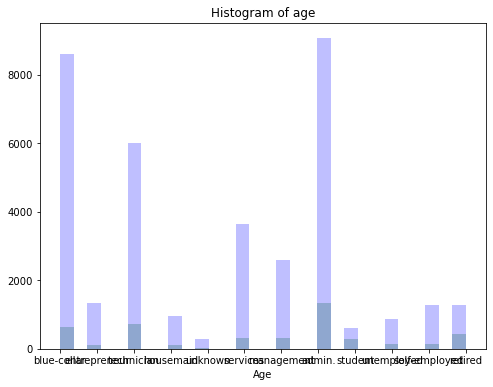

In [78]:
plt.figure(figsize=(8,6))
plt.hist(df_bank.loc[df_bank['y']=="yes"]['job'],label='Yes',alpha=0.25, color='g',bins=30)
#plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.hist(df_bank.loc[df_bank['y']=="no"]['job'],label='No',alpha=0.25,color='b',bins=30)

plt.xlabel('Age')
#plt.ylabel('Probability')
plt.title('Histogram of age')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.show()

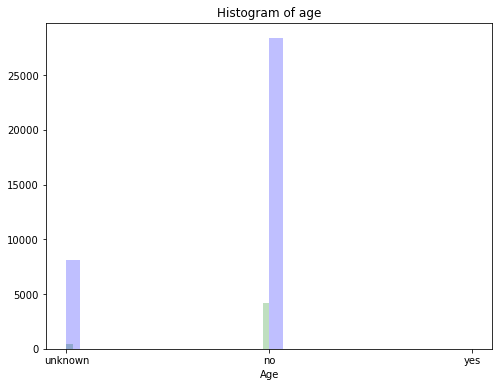

In [79]:
plt.figure(figsize=(8,6))
plt.hist(df_bank.loc[df_bank['y']=="yes"]['default'],label='Yes',alpha=0.25, color='g',bins=30)
#plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.hist(df_bank.loc[df_bank['y']=="no"]['default'],label='No',alpha=0.25,color='b',bins=30)

plt.xlabel('Age')
#plt.ylabel('Probability')
plt.title('Histogram of age')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.show()

There is a definite skewness to the left for both classes, 

In [88]:
from pandasql import sqldf
#output = sqldf("select job,count(*) as count_of_rows from df_bank where y =='yes' group by job")
#print(output)
#print(sqldf("select count(*),y as count_of_rows from df_bank group by y"))
output= sqldf("select count(*), `default` from df_bank group by `default`")
print(output)

   count(*)  default
0     32577       no
1      8596  unknown
2         3      yes


Mostly, default is no or unknown. Hence this can be removed from consideration

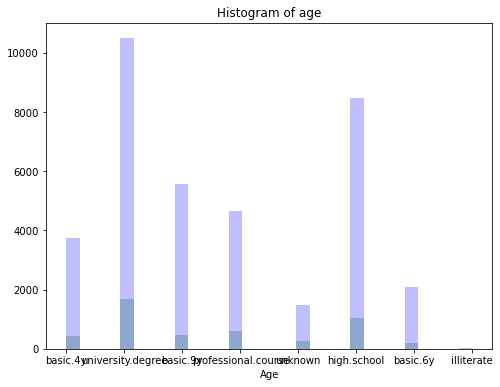

In [89]:
plt.figure(figsize=(8,6))
plt.hist(df_bank.loc[df_bank['y']=="yes"]['education'],label='Yes',alpha=0.25, color='g',bins=30)
#plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.hist(df_bank.loc[df_bank['y']=="no"]['education'],label='No',alpha=0.25,color='b',bins=30)

plt.xlabel('Age')
#plt.ylabel('Probability')
plt.title('Histogram of age')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.show()

It is defined as the covariance between two variables divided by the product of the standard deviations of the two variables.
formula for correlation coefficient between two variables
Where the covariance between X and Y COV(X, Y) is further defined as the ‘expected value of the product of the deviations of X and Y from their respective means’.
The formula for covariance would make it clearer.
formula for covariance between two variables
So the formula for Pearson’s correlation would then become:
expanded formula of correlation coefficient by substituting for covariance
The value of ρ lies between -1 and +1.
Values nearing +1 indicate the presence of a strong positive relation between X and Y, whereas those nearing -1 indicate a strong negative relation between X and Y.
Values near to zero mean there is an absence of any relationship between X and Y.

In [1]:
number1=30
number2=50
mult=number1*number2
print(mult)

1500


In [2]:
user_num= input('enter')
print('num:',user_num)

enter12
num: 12


In [3]:
marks=float(input('enter marks'))

if (marks==100) | (marks>50):
    print('passed')
else:
    print('try again')

enter marks34
try again


In [4]:
m=15
m*=4
m

60

In [5]:
names=['simran','ray']

'nancy' in names

False

In [7]:
import numpy as np
mylist=[1,2,3]
n=np.array(mylist)
print(n)
n

[1 2 3]


array([1, 2, 3])

In [11]:
np.arange(0,50,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [12]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
x= np.eye(8)
x

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [35]:
x[x>0]=5
x

array([[5., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 0., 0., 5.]])

In [14]:
np.linspace(0,10,20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [73]:
#x=np.random.randn(3,2) #uniform distribution
x=np.random.rand(3,2) #standard normal distribution
#x=np.random.randint(1,10,20)# random numbers from start to end
x

array([[0.75049656, 0.03170054],
       [0.40252084, 0.69571088],
       [0.06986636, 0.61399106]])

In [61]:
import pandas as pd
x[0:4]=10
x_copy=x.copy()
df=pd.DataFrame(x_copy.reshape(4,5), index='row1 row2 row3 row4'.split(),columns='col1,col2,col3,col4,col5'.split(','))
#df.head()
type(df[['col1','col2']])
#df
df['new']=[1,2,3,4]
#df
df.set_index('new',inplace=True)
df.rename(columns={'col1':'new_col1'},inplace=True)
df.columns
df.index
df.tail(2)

,new_col1,col2,col3,col4,col5
new,,,,,
3,4,1,4,5,2
4,1,1,7,8,2


In [79]:
x=pd.DataFrame(np.random.randint(5,25,20).reshape(5,4),index='row1 row2 row3 row4 row5 '.split(),columns='col1,col2,col3,col4'.split(','))
#x.describe().T
#x[x[0]>2].loc[5,6]=5
x.sort_values(by='col1',ascending=True)
y=x.T
y
#join=x.join(y, how='left')
#join


,row1,row2,row3,row4,row5
col1,22,13,5,23,16
col2,13,18,20,10,5
col3,11,17,17,11,14
col4,8,7,22,5,11
